<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Techniques/blob/main/Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-1

**Note to Learners**:

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [1]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Problem-1

How many samples does the dataset have?

In [2]:
# Enter your solution here
print(X.shape[0])

100


## Problem-2

How many features does the dataset have?

In [3]:
# Enter your solution here
print(X.shape[1])

784


## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

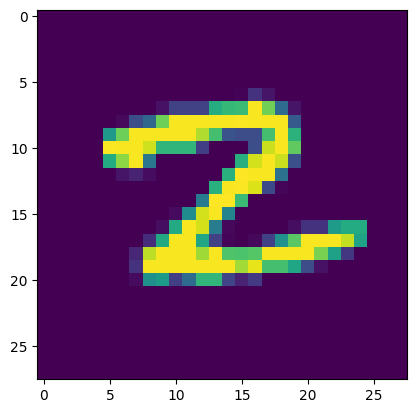

In [4]:
# Enter your solution here
'''I have a matrix X of size 100x784 where 100 rows correspond to 100 different samples, each with 784 (i.e, 28x28) features.
   To plot an image out of these 100 image samples, I need to -
      1. choose an image (choosing 53rd image)
      2. resize its feature vector from a vector with shape 1x784 to 28x28'''

import matplotlib.pyplot as plt
img = X[10].reshape((28,28))
plt.imshow(img)

## Problem-4

Center the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [5]:
# Enter your solution here
def centre(m):
  return m - m.mean(axis = 0)

n, d = X.shape
X_prime = centre(X)
print((np.sqrt((X_prime**2).sum()))/(n*d))

0.23242174456564685


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [6]:
# Enter your solution here
def covariance(m):
  nrow = m.shape[0]
  return m.T @ m/nrow

C = covariance(X_prime)
d = C.shape[0]  # C is a square matrix so C.shape[0] = C.shape[1]
print((np.sqrt((C**2).sum()))/(d**2))

1.3648061009232249


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [15]:
# Enter your solution here
def principalComponent(m):
  d = m.shape[0]
  eigval, eigvec = np.linalg.eigh(m)
  w1, w2 = eigvec[:, -1], eigvec[:, -2]
  return w1, w2

w1, w2 = principalComponent(C)
w = w1 + w2
print(abs(w.sum()))

1.051624388059819


## Problem-7

Visualize the first principal component as an image.

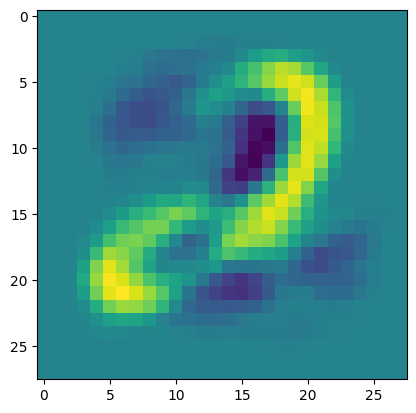

In [16]:
# Enter your solution here
w1_img = w1.reshape(28,28)
plt.imshow(w1_img)

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [18]:
# Enter your solution here
'''sum of k largest eigvalues / sum of all eigvalues should be >= 0.95'''

def findK(m):
  eigval, eigvec = np.linalg.eigh(m)
  eigval = list(reversed(eigval))   # to find the top k largest values
  total = sum(eigval)

  ksum = 0
  for k in range(len(eigval)):
    ksum += eigval[k]
    if ksum/total >= 0.95:
      return k+1
  return len(eigval)

findK(C)

53

## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



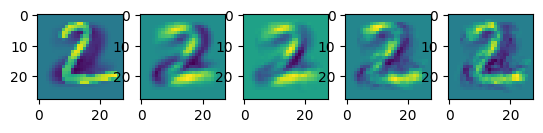

In [19]:
# Enter your solution here
def reconstruct(C, test_image, thresh):
    eigval, eigvec = np.linalg.eigh(C)
    eigval = list(reversed(eigval))
    total = sum(eigval)
    K = len(eigval)

    ksum = 0
    for k in range(K):
      ksum += eigval[k]
      if ksum / total >= thresh:
          K = k + 1
          break
    W = eigvec[:, -K: ]
    coeff = test_image @ W
    return W @ coeff

# Original mean subtracted image
test_image = np.float64(test_image) - X.mean(axis = 0)
plt.subplot(1, 5, 1)
plt.imshow(test_image.reshape(28, 28))

# 0.20
recon_image = reconstruct(C, test_image, 0.20)
plt.subplot(1, 5, 2)
plt.imshow(recon_image.reshape(28, 28))

# 0.5
recon_image = reconstruct(C, test_image, 0.50)
plt.subplot(1, 5, 3)
plt.imshow(recon_image.reshape(28, 28))

# 0.80
recon_image = reconstruct(C, test_image, 0.80)
plt.subplot(1, 5, 4)
plt.imshow(recon_image.reshape(28, 28))

# 0.95
plt.subplot(1, 5, 5)
recon_image = reconstruct(C, test_image, 0.95)
plt.imshow(recon_image.reshape(28, 28))